# Exploratory Data Analysis

This notebook focuses on understanding the transaction dataset before modeling. We'll:
- Load and inspect the raw data
- Validate data quality (timestamps, missing values, duplicates)
- Analyze basic distributions
- Generate required descriptive plots
- Document key observations for modeling decisions

In [ ]:
# Core imports (import these first for faster startup)
import pandas as pd
import numpy as np
from datetime import datetime
import sys
from pathlib import Path

# Import project configuration (paths and constants)
# Add project root to path to enable imports
PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))
from src.config import (
    PROJECT_ROOT as CONFIG_PROJECT_ROOT,
    DATA_RAW,
    DATA_PROCESSED,
    FIGURES_DIR,
    OUTPUTS_DIR,
    ensure_directories
)

# Ensure all directories exist
ensure_directories()

# Use config paths (aliased for backward compatibility in notebook)
PROJECT_ROOT = CONFIG_PROJECT_ROOT
OUTPUTS = OUTPUTS_DIR
FIGURES = FIGURES_DIR

print("✓ Core imports loaded")
print(f"✓ Project root: {PROJECT_ROOT}")
print(f"✓ Data raw directory: {DATA_RAW}")
print(f"✓ Data processed directory: {DATA_PROCESSED}")
print(f"✓ Outputs directory: {OUTPUTS_DIR}")
print(f"✓ Figures directory: {FIGURES_DIR}")

✓ Core imports loaded
✓ Project root: /mnt/c/Users/zaido/OneDrive/Bureau/Quod_THA
✓ Data directory: /mnt/c/Users/zaido/OneDrive/Bureau/Quod_THA/data/raw
✓ OUTPUTS directory: /mnt/c/Users/zaido/OneDrive/Bureau/Quod_THA/outputs


In [46]:
# Matplotlib setup (load separately to avoid slowing down initial imports)
import matplotlib.pyplot as plt
%matplotlib inline

# Set plotting style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except OSError:
    # Fallback for older matplotlib versions
    plt.style.use('seaborn-darkgrid')

print("✓ Matplotlib configured")

✓ Matplotlib configured


## 1. Data Loading

Load and combine the raw transaction files. Data cleaning (duplicate removal, product name consolidation, date conversion) is handled by `src.data.load_and_process_transactions()`, which saves cleaned data to `data/processed/` for reuse.

In [ ]:
# Import data loading function from src
from src.data import load_and_process_transactions

# Load and process transactions (will save to data/processed if not already processed)
# Uses paths from config.py by default
df = load_and_process_transactions(
    force_reprocess=False  # Set to True to force reprocessing
)

print(f"\nLoaded cleaned data:")
print(f"Total rows: {len(df):,}")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
df.head()

Total rows: 975,955
Shape: (975955, 3)

Columns: ['customer_id', 'product_id', 'date']


,customer_id,product_id,date
0,8649525,Opel,2017-01-31T09:31:08.873Z
1,8649525,Volkswagen,2017-02-03T16:59:16.610Z
2,8649525,Volkswagen,2017-02-05T19:47:55.353Z
3,8649525,Volkswagen,2017-02-05T19:48:14.633Z
4,8649525,Volkswagen,2017-02-06T09:59:49.053Z


## 2. Schema and Data Type Inspection

In [4]:
# Inspect schema
print("Column names:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nDataFrame info:")
df.info()

Column names: ['customer_id', 'product_id', 'date']

Data types:
customer_id    int64
product_id       str
date             str
dtype: object

DataFrame info:
<class 'pandas.DataFrame'>
RangeIndex: 975955 entries, 0 to 975954
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   customer_id  975955 non-null  int64
 1   product_id   975955 non-null  str  
 2   date         975955 non-null  str  
dtypes: int64(1), str(2)
memory usage: 22.3 MB


In [60]:
# Note: Dates are already converted to datetime by load_and_process_transactions()
# This cell is for validation/verification

# Check the date types (should already be datetime)
print("Date column type:")
print(df.dtypes)
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
print(f"Date column is datetime: {pd.api.types.is_datetime64_any_dtype(df['date'])}")

Date column type:
customer_id                  int64
product_id                     str
date           datetime64[us, UTC]
year_month               period[M]
year                         int32
month                        int32
dtype: object

Date range: 2017-01-01 08:32:26.307000+00:00 to 2020-03-17 00:08:21.430000+00:00
Date column is datetime: True


## 3. Data Validation

Check for missing values, duplicates, and validate timestamp consistency.

In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")


# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"Duplicate (customer_id, product_id, date) combinations: {df.duplicated(subset=['customer_id', 'product_id', 'date']).sum()}")

Missing values:
customer_id    0
product_id     0
date           0
dtype: int64

Total missing: 0

Duplicate rows: 3
Duplicate (customer_id, product_id, date) combinations: 3


In [62]:
# Basic statistics on key columns
print("Customer ID statistics:")
print(f"Unique customers: {df['customer_id'].nunique():,}")
print(f"Customer ID range: {df['customer_id'].min()} to {df['customer_id'].max()}")

print("\nProduct ID statistics:")
print(f"Unique products: {df['product_id'].nunique()}")
print(f"Products: {sorted(df['product_id'].unique())}")

Customer ID statistics:
Unique customers: 2,002
Customer ID range: 1001614 to 9997881

Product ID statistics:
Unique products: 48
Products: ['Abarth', 'Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Chrysler', 'Citroen', 'DS', 'Dacia', 'Equipe', 'Fiat', 'Ford', 'Harley-Davidson', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lancia', 'Land Rover', 'Lexus', 'MCC/Smart', 'Mazda', 'Mercedes Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Other', 'Oxygen', 'Peugeot', 'Piaggio', 'Porsche', 'Renault', 'Seat', 'Skoda', 'Ssangyong', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Yamaha']


In [ ]:
# # Inspect odd / potentially invalid product values
# suspicious_products = ["Not a make", "Undefined", "├ÅTS"]

# print("Suspicious product values and their counts:\n")
# for p in suspicious_products:
#     count = (df["product_id"] == p).sum()
#     print(f"- {p!r}: {count} rows")

# print("\nExamples of rows with suspicious products:\n")
# for p in suspicious_products:
#     subset = df[df["product_id"] == p].head(5)
#     print(f"=== {p!r} (showing up to 5 rows) ===")
#     if subset.empty:
#         print("No rows found.\n")
#     else:
#         print(subset)
#         print()

# # Share relative frequencies to understand importance
# product_counts = df["product_id"].value_counts()
# total_rows = len(df)

# print("Relative frequency of suspicious products:\n")
# for p in suspicious_products:
#     freq = product_counts.get(p, 0)
#     pct = 100 * freq / total_rows
#     print(f"- {p!r}: {freq} rows ({pct:.4f}% of all transactions)")

# # Baseline comparison
# normal_counts = product_counts.drop(labels=[p for p in suspicious_products if p in product_counts.index])

# print("\nBaseline for normal brands (top 2 most frequent):")
# for brand, cnt in normal_counts.head(2).items():
#     pct = 100 * cnt / total_rows
#     print(f"- {brand!r}: {cnt} rows ({pct:.4f}% of all transactions)")

# print("\nBaseline for normal brands (bottom 2 least frequent):")
# for brand, cnt in normal_counts.tail(2).items():
#     pct = 100 * cnt / total_rows
#     print(f"- {brand!r}: {cnt} rows ({pct:.4f}% of all transactions)")

# # Aggregate baseline: mean/median counts across normal brands
# normal_mean = normal_counts.mean()
# normal_median = normal_counts.median()
# print("\nAggregate baseline for normal brands:")
# print(f"- Mean transactions per normal brand: {normal_mean:.2f}")
# print(f"- Median transactions per normal brand: {normal_median:.2f}")


In [ ]:
# odd_products = ["Not a make", "Undefined", "├ÅTS"]

# print("Before recoding (selected labels):")
# print(df["product_id"].value_counts().loc[odd_products])

# # Replace these labels by 'Other' in-place
# replacement_map = {p: "Other" for p in odd_products}
# df["product_id"] = df["product_id"].replace(replacement_map)

# print("\nAfter recoding:")
# print(df["product_id"].value_counts().loc[["Other"]])

Before recoding (selected labels):
product_id
Not a make     5
Undefined      3
├ÅTS          11
Name: count, dtype: int64

After recoding:
product_id
Other    19
Name: count, dtype: int64


## 4. Basic Distributions

Analyze transactions per customer, per product, and over time.

In [63]:
# Transactions per customer
transactions_per_customer = df.groupby('customer_id').size()
print("Transactions per customer - Summary statistics:")
print(transactions_per_customer.describe())
print(f"\nMedian: {transactions_per_customer.median():.1f}")
print(f"Total customers: {len(transactions_per_customer):,}")

Transactions per customer - Summary statistics:
count     2002.000000
mean       487.488511
std       1557.581049
min          1.000000
25%         20.250000
50%        103.000000
75%        394.000000
max      34963.000000
dtype: float64

Median: 103.0
Total customers: 2,002


In [64]:
# Transactions per product
transactions_per_product = df.groupby('product_id').size().sort_values(ascending=False)
print("Transactions per product:")
print(transactions_per_product)
print(f"\nTotal products: {len(transactions_per_product)}")

Transactions per product:
product_id
Renault            201916
Volkswagen          87189
Peugeot             85550
Opel                82930
Audi                70418
BMW                 57626
Toyota              52725
Nissan              46581
Ford                42723
Seat                42565
Citroen             41003
Mercedes Benz       36963
Abarth              29438
Fiat                17953
Volvo               16905
Land Rover          14496
Skoda                8351
Hyundai              5510
Mini                 4797
Dacia                4786
Mazda                4218
Lexus                3058
Mitsubishi           2918
Kia                  2644
Porsche              1553
Jeep                 1495
Iveco                1471
Honda                1415
Infiniti             1295
Alfa Romeo           1188
Jaguar               1040
Chevrolet             771
Suzuki                609
Ssangyong             549
Lancia                517
Piaggio               208
Subaru                204
D

In [65]:
# Transactions over time (by month)
df['year_month'] = df['date'].dt.to_period('M')
transactions_over_time = df.groupby('year_month').size()

print("Transactions per month:")
print(transactions_over_time)
print(f"\nDate range: {transactions_over_time.index.min()} to {transactions_over_time.index.max()}")

Transactions per month:
year_month
2017-01    12459
2017-02    32986
2017-03    37451
2017-04    24347
2017-05    42609
2017-06    60730
2017-07    44717
2017-08    36690
2017-09    41564
2017-10    57568
2017-11    49303
2017-12    14467
2018-01    12894
2018-02    14834
2018-03    13041
2018-04    10361
2018-05    19663
2018-06    31572
2018-07    31109
2018-08    19463
2018-09    21029
2018-10    41075
2018-11    29286
2018-12    32478
2019-01    30439
2019-02    14011
2019-03    21977
2019-04    15797
2019-05    20536
2019-06    17967
2019-07    21369
2019-08    15947
2019-09    14768
2019-10    18500
2019-11    17171
2019-12    11080
2020-01    11085
2020-02     9187
2020-03     4422
Freq: M, dtype: int64

Date range: 2017-01 to 2020-03


/tmp/ipykernel_6066/3901876583.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


## 5. Required Plots

### 5.1 Customer Activity Ranking

Create an ordered (descending) plot showing total number of transactions per customer from most active to least active.

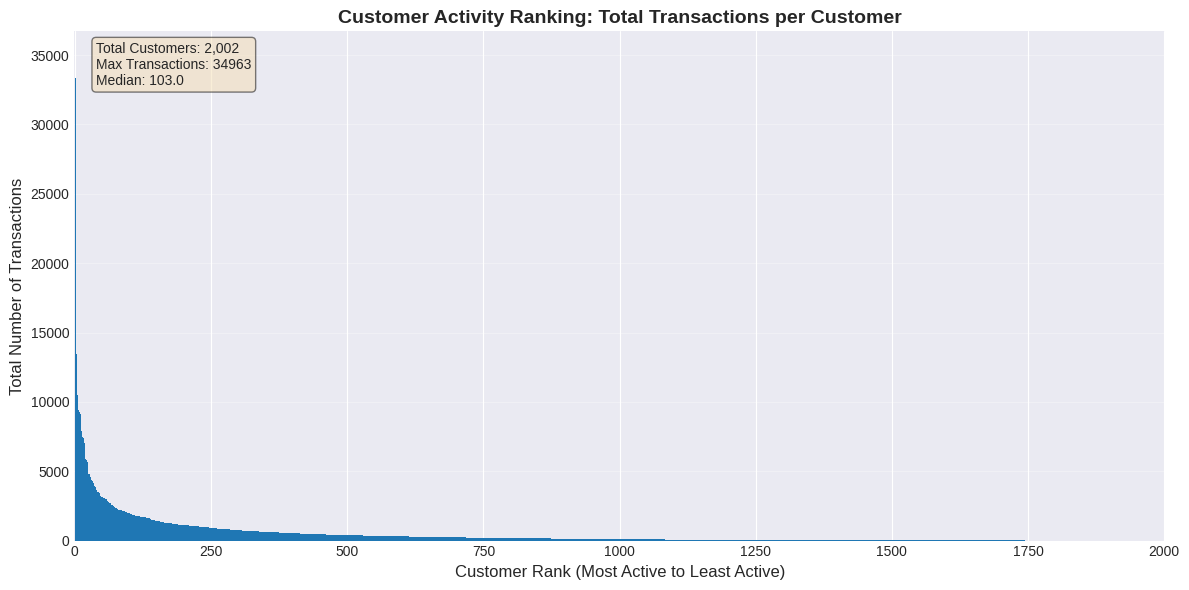

In [ ]:
# Sort customers by transaction count (descending)
customer_activity = transactions_per_customer.sort_values(ascending=False)

# Optionally focus on the top N most active customers to get a tighter view
TOP_N = None  # e.g. set to 500 to zoom in; keep as None to use all customers
if TOP_N is not None:
    customer_activity_plot = customer_activity.iloc[:TOP_N]
else:
    customer_activity_plot = customer_activity

# Create a tight bar plot (histogram-like) of descending transactions per customer
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(customer_activity_plot)), customer_activity_plot.values, width=1.0)
ax.set_xlim(-1, len(customer_activity_plot))
ax.set_xlabel('Customer Rank (Most Active to Least Active)', fontsize=12)
ax.set_ylabel('Total Number of Transactions', fontsize=12)
ax.set_title('Customer Activity Ranking: Total Transactions per Customer', fontsize=14, fontweight='bold')
ax.grid(True, axis='y', alpha=0.3)

# Add some statistics as text
ax.text(0.02, 0.98,
        f'Total Customers: {len(customer_activity):,}\nMax Transactions: {customer_activity.max()}\nMedian: {customer_activity.median():.1f}',
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(FIGURES / 'customer_activity_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.2 Monthly Product Transaction Frequency (2018)

For any product ID, create a plot showing its transaction frequency per month for the year 2018.

In [67]:
# Filter data for 2018
df_2018 = df[df['date'].dt.year == 2018].copy()

# Get monthly transaction counts per product for 2018
monthly_product_counts = df_2018.groupby(['product_id', 'year_month']).size().reset_index(name='transaction_count')
monthly_product_counts['year_month'] = monthly_product_counts['year_month'].astype(str)

# Get all products and all months in 2018
all_products = sorted(df['product_id'].unique())
all_months_2018 = [f'2018-{i:02d}' for i in range(1, 13)]

# Create a complete grid (products x months) and fill missing with 0
complete_grid = pd.MultiIndex.from_product([all_products, all_months_2018], names=['product_id', 'year_month'])
monthly_product_counts_complete = monthly_product_counts.set_index(['product_id', 'year_month']).reindex(complete_grid, fill_value=0).reset_index()

print(f"Products in dataset: {all_products}")
print(f"\nSample of monthly counts:")
print(monthly_product_counts_complete.head(20))

Products in dataset: ['Abarth', 'Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Chrysler', 'Citroen', 'DS', 'Dacia', 'Equipe', 'Fiat', 'Ford', 'Harley-Davidson', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lancia', 'Land Rover', 'Lexus', 'MCC/Smart', 'Mazda', 'Mercedes Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Other', 'Oxygen', 'Peugeot', 'Piaggio', 'Porsche', 'Renault', 'Seat', 'Skoda', 'Ssangyong', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Yamaha']

Sample of monthly counts:
    product_id year_month  transaction_count
0       Abarth    2018-01                265
1       Abarth    2018-02                233
2       Abarth    2018-03                226
3       Abarth    2018-04                214
4       Abarth    2018-05                135
5       Abarth    2018-06                236
6       Abarth    2018-07                 37
7       Abarth    2018-08                 86
8       Abarth    2018-09                134
9     

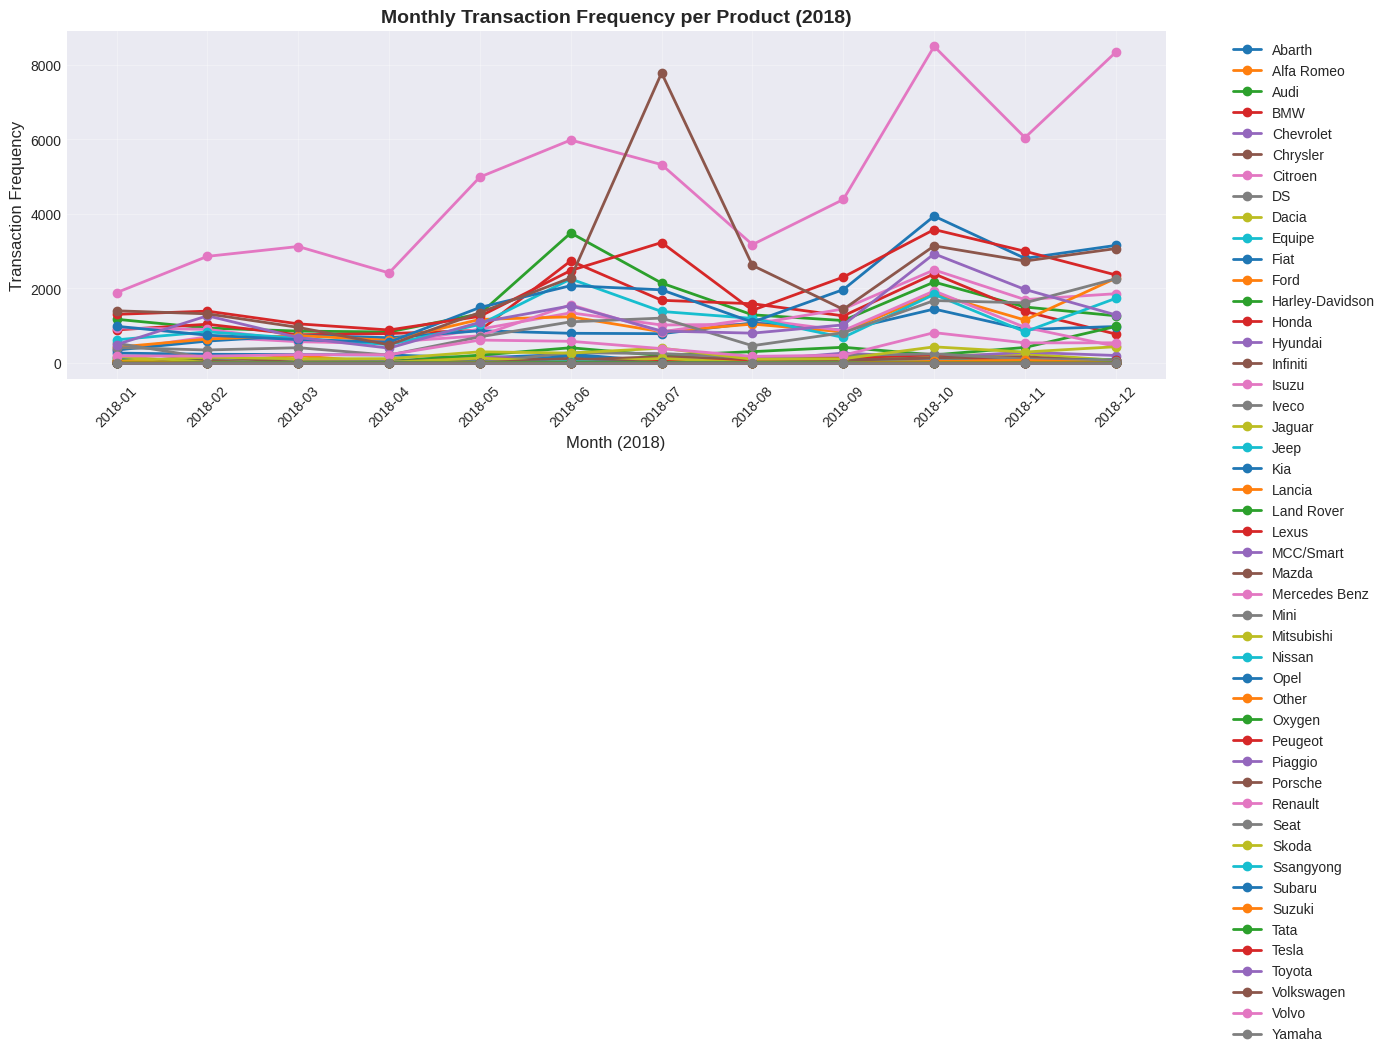

In [ ]:
# Create plot for all products
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each product
for product in all_products:
    product_data = monthly_product_counts_complete[monthly_product_counts_complete['product_id'] == product]
    ax.plot(product_data['year_month'], product_data['transaction_count'], 
            marker='o', label=product, linewidth=2, markersize=6)

ax.set_xlabel('Month (2018)', fontsize=12)
ax.set_ylabel('Transaction Frequency', fontsize=12)
ax.set_title('Monthly Transaction Frequency per Product (2018)', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(FIGURES / 'monthly_product_frequency_2018.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Additional Exploratory Analysis

### 6.1 Overall Transaction Trends Over Time

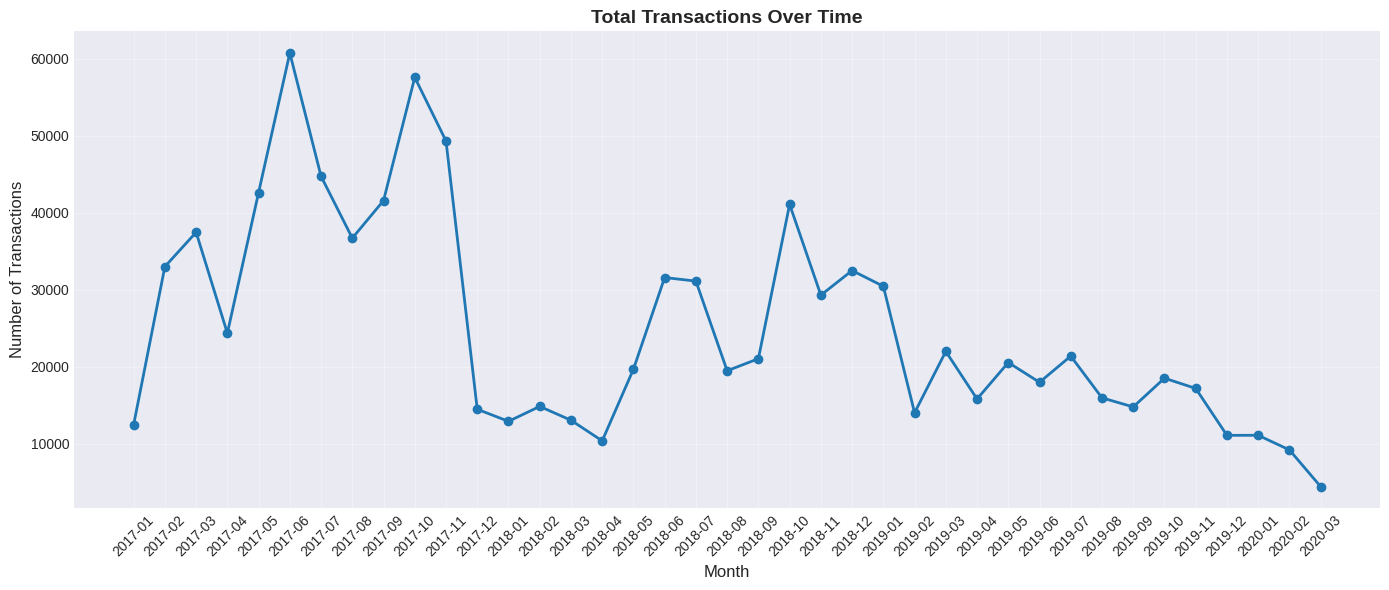

In [ ]:
# Plot overall transaction volume over time
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(transactions_over_time.index.astype(str), transactions_over_time.values, 
        marker='o', linewidth=2, markersize=6)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Transactions', fontsize=12)
ax.set_title('Total Transactions Over Time', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(FIGURES / 'transactions_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

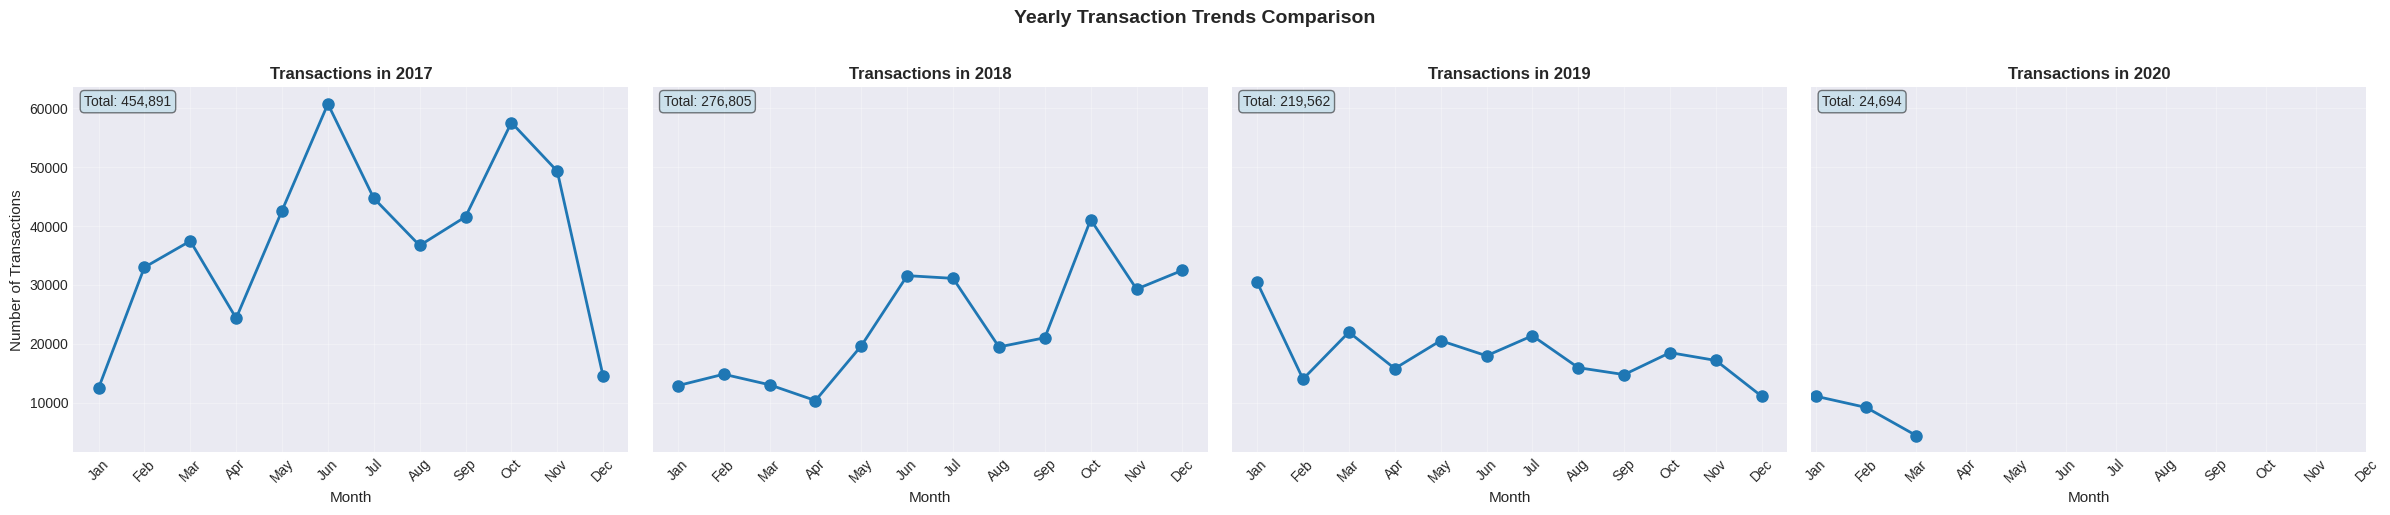

In [ ]:
# Transactional trends by year (side by side comparison)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Get unique years and sort them
years = sorted(df['year'].unique())
n_years = len(years)

# Create subplots: one per year, arranged horizontally
fig, axes = plt.subplots(1, n_years, figsize=(6*n_years, 5), sharey=True)

for idx, year in enumerate(years):
    ax = axes[idx]
    
    # Filter data for this year
    year_data = df[df['year'] == year]
    
    # Group by month and count transactions
    monthly_counts = year_data.groupby('month').size().sort_index()
    
    # Plot monthly trends
    ax.plot(monthly_counts.index, monthly_counts.values, 
            marker='o', linewidth=2, markersize=8)
    ax.set_xlabel('Month', fontsize=11)
    if idx == 0:
        ax.set_ylabel('Number of Transactions', fontsize=11)
    ax.set_title(f'Transactions in {year}', fontsize=12, fontweight='bold')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    ax.grid(True, alpha=0.3)
    
    # Add total count as text
    total_year = year_data.shape[0]
    ax.text(0.02, 0.98, f'Total: {total_year:,}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.suptitle('Yearly Transaction Trends Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(FIGURES / 'yearly_transaction_trends.png', dpi=300, bbox_inches='tight')
plt.show()

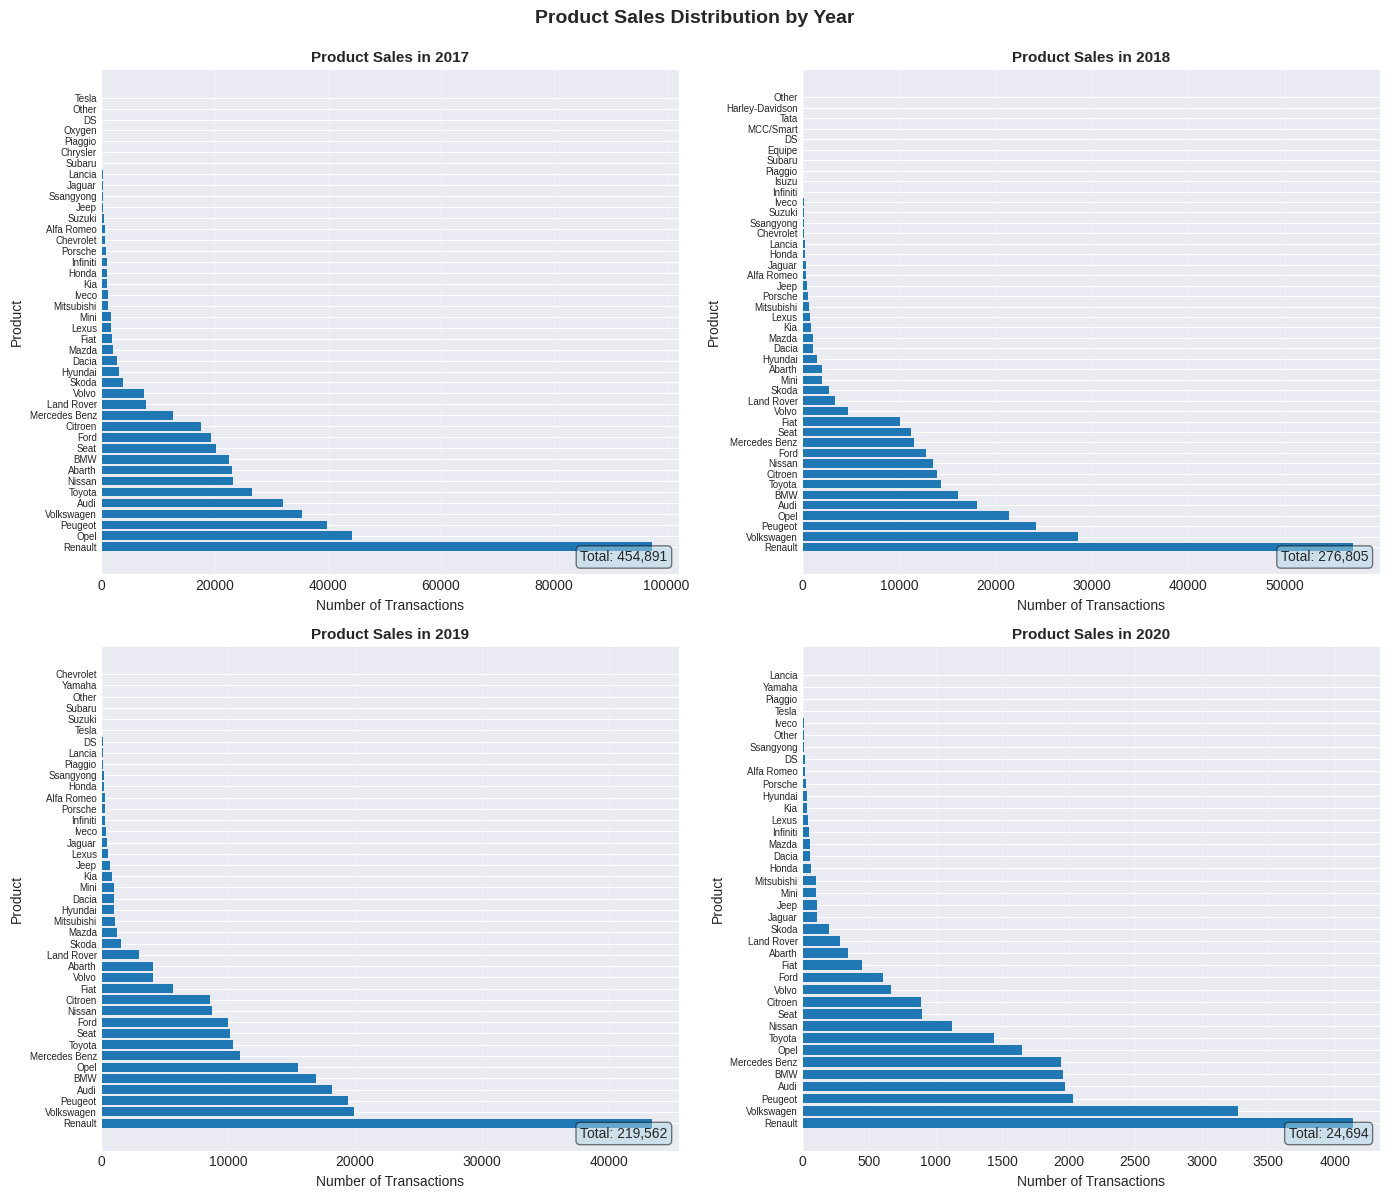

In [ ]:
# Product sales histograms by year
# Group transactions by year and product
df['year'] = df['date'].dt.year
product_sales_by_year = df.groupby(['year', 'product_id']).size().reset_index(name='transaction_count')

# Get unique years
years = sorted(df['year'].unique())
n_years = len(years)

# Create 2x2 grid layout for better legibility
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 12))

# Flatten axes array for easier indexing
axes_flat = axes.flatten()

for idx, year in enumerate(years):
    if idx >= n_rows * n_cols:
        break  # Only plot up to 4 years in 2x2 grid
    
    ax = axes_flat[idx]
    
    # Filter data for this year
    year_data = product_sales_by_year[product_sales_by_year['year'] == year]
    
    # Sort by transaction count (descending) for better visualization
    year_data_sorted = year_data.sort_values('transaction_count', ascending=False)
    
    # Print top 5 and bottom 5 products for this year
    print(f"\n{'='*60}")
    print(f"Year {year} - Product Sales Summary")
    print(f"{'='*60}")
    print("\nTop 5 Products:")
    top_5 = year_data_sorted.head(5)
    for rank, (_, row) in enumerate(top_5.iterrows(), 1):
        print(f"  {rank}. {row['product_id']:20s} - {row['transaction_count']:6,} transactions")
    
    print("\nBottom 5 Products:")
    bottom_5 = year_data_sorted.tail(5)
    total_products = len(year_data_sorted)
    for idx, (_, row) in enumerate(bottom_5.iterrows()):
        rank = total_products - 4 + idx
        print(f"  {rank}. {row['product_id']:20s} - {row['transaction_count']:6,} transactions")
    
    # Create horizontal bar chart (histogram-like)
    # Each histogram has its own independent y-axis labels (no sharey!)
    ax.barh(range(len(year_data_sorted)), year_data_sorted['transaction_count'].values)
    ax.set_yticks(range(len(year_data_sorted)))
    ax.set_yticklabels(year_data_sorted['product_id'].values, fontsize=7)
    ax.set_xlabel('Number of Transactions', fontsize=10)
    ax.set_ylabel('Product', fontsize=10)
    ax.set_title(f'Product Sales in {year}', fontsize=11, fontweight='bold')
    ax.grid(True, axis='x', alpha=0.3)
    
    # Add total count as text
    total_year = year_data['transaction_count'].sum()
    ax.text(0.98, 0.02, f'Total: {total_year:,}', 
            transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Hide unused subplots if there are fewer than 4 years
for idx in range(n_years, n_rows * n_cols):
    axes_flat[idx].axis('off')

plt.suptitle('Product Sales Distribution by Year', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(FIGURES / 'product_sales_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

### 6.2 Customer Activity Distribution

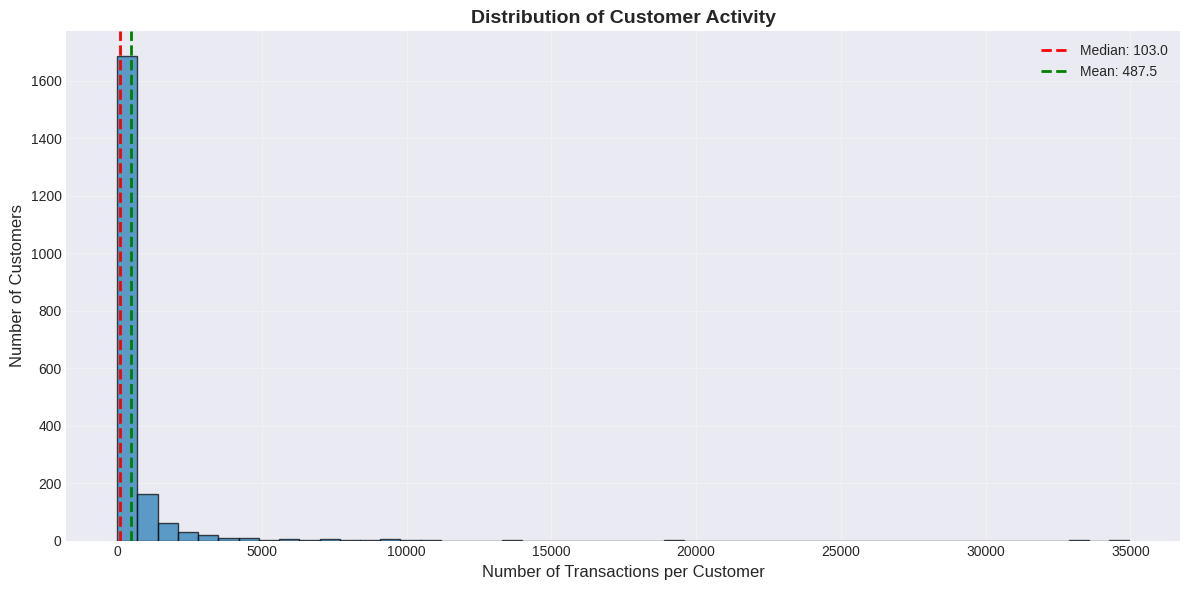

In [ ]:
# Histogram of transactions per customer
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(customer_activity.values, bins=50, edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Transactions per Customer', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Distribution of Customer Activity', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add statistics
ax.axvline(customer_activity.median(), color='red', linestyle='--', linewidth=2, label=f'Median: {customer_activity.median():.1f}')
ax.axvline(customer_activity.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {customer_activity.mean():.1f}')
ax.legend()

plt.tight_layout()
plt.savefig(FIGURES / 'customer_activity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Key Observations and Insights

Document findings that will inform modeling decisions.

In [69]:
# Calculate key statistics for documentation
print("=== KEY OBSERVATIONS ===\n")

# Customer heterogeneity
print(f"\n1. CUSTOMER HETEROGENEITY:")
print(f"   - Transactions per customer - Mean: {customer_activity.mean():.2f}")
print(f"   - Transactions per customer - Median: {customer_activity.median():.2f}")
print(f"   - Transactions per customer - Std: {customer_activity.std():.2f}")
print(f"   - Coefficient of variation: {customer_activity.std() / customer_activity.mean():.2f}")
print(f"   - Top 10% of customers account for {customer_activity.nlargest(int(len(customer_activity) * 0.1)).sum() / customer_activity.sum():.1%} of transactions")

# Temporal coverage
print(f"\n2. TEMPORAL COVERAGE:")
print(f"   - Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"   - Total days: {(df['date'].max() - df['date'].min()).days}")
print(f"   - Months with data: {df['year_month'].nunique()}")

# Product distribution
print(f"\n3. PRODUCT DISTRIBUTION:")
print(f"   - Number of unique products: {df['product_id'].nunique()}")
print(f"   - Most popular product: {transactions_per_product.index[0]} ({transactions_per_product.iloc[0]:,} transactions)")
print(f"   - Least popular product: {transactions_per_product.index[-1]} ({transactions_per_product.iloc[-1]:,} transactions)")

# Seasonality check (preliminary)
print(f"\n4. SEASONALITY (Preliminary):")
monthly_2018 = df_2018.groupby(df_2018['date'].dt.month).size()
if len(monthly_2018) > 0:
    print(f"   - 2018 monthly transaction counts:")
    for month, count in monthly_2018.items():
        month_name = pd.Timestamp(2018, month, 1).strftime('%B')
        print(f"     {month_name}: {count:,}")
    # Check for seasonality pattern
    if monthly_2018.max() / monthly_2018.min() > 1.5:
        print(f"   - Significant variation detected (max/min ratio: {monthly_2018.max() / monthly_2018.min():.2f})")
    else:
        print(f"   - Relatively stable across months")

=== KEY OBSERVATIONS ===


1. CUSTOMER HETEROGENEITY:
   - Transactions per customer - Mean: 487.49
   - Transactions per customer - Median: 103.00
   - Transactions per customer - Std: 1557.58
   - Coefficient of variation: 3.20
   - Top 10% of customers account for 65.0% of transactions

2. TEMPORAL COVERAGE:
   - Date range: 2017-01-01 to 2020-03-17
   - Total days: 1170
   - Months with data: 39

3. PRODUCT DISTRIBUTION:
   - Number of unique products: 48
   - Most popular product: Renault (201,916 transactions)
   - Least popular product: Harley-Davidson (4 transactions)

4. SEASONALITY (Preliminary):
   - 2018 monthly transaction counts:
     January: 12,894
     February: 14,834
     March: 13,041
     April: 10,361
     May: 19,663
     June: 31,572
     July: 31,109
     August: 19,463
     September: 21,029
     October: 41,075
     November: 29,286
     December: 32,478
   - Significant variation detected (max/min ratio: 3.96)


### Summary for Modeling

Based on the exploratory analysis:

1. **Data Quality**: Data quality was good overall, very little duplicates which were treated as errors and removed (alternative would've been to consider purchases with quanitity > 1 as having logged over mutiple lines but there were so little it did not matter). Some product_ids were found to be odd and were grouped into one "Other" category.
2. **Customer Heterogeneity**: Variance is high meaning we need a model where the variance scales stronger than the mean, first consideration of Poisson distribution is therefore not fit.
3. **Temporal Patterns**: We can observe in 2017 and 2018 that there are strong peaks of activity towards the middle and end of year (summer and beginning of Winter). This trend does not translate as cleanly in 2019 which seems to show more market stability with smaller variance. Very little data for 2020 with a sharp drop off in sales since the beginning of the year (understandable as it could be heavily justified by the social context at the time --Pandemic--)
4. **Product Dynamics**: 

These observations will guide:
- Feature engineering (recency, frequency, rolling windows)
- Model choice (count modeling with Tweedie GLM)
- Temporal splitting strategy (strict time-based train/test splits)